In [1]:
set.seed(1234)

library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)

devtools::load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/"

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Attaching SeuratObject

Loading required package: Rcpp

ℹ Loading Socrates
Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory materia

In [2]:
#bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Pmiliaceum/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/"

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Pmiliaceum.gff")
chr <- paste0(reference_genome_path,"pm_genmap_output.chrom.sizes")

#output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/"
#output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/QC_output/imgs/"

pre <- "panicum_mullet_sub_clustering"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/"
Proso_millet.rep1 <- paste0(analysis_path, "panicum_millet.filter.mpq_10.rmdup.unique.sorted.bed")

print(Proso_millet.rep1)
#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

[1] "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.filter.mpq_10.rmdup.unique.sorted.bed"


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/panicum_millet.snake/03.bed_files_merged/panicum_millet.filter.mpq_10.rmdup.unique.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take obj while for big BED files) ...

 - finished loading data



In [16]:
library(tidyverse)
marker_list_pm_file <- "/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.final_all_markers.visualize.txt"
marker_list_pm <- read_delim(marker_list_pm_file, delim='\t', 
                                       col_names = c("chr", "start", "stop", "geneID", "gene_name", "cell_type", "tissue"))

loaded_socrates_data <- read.table("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/clustering/Pm_leaf.merged_replicates.SVD.full.metadata.txt")

Rows: 5076 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chr, start, stop, geneID, gene_name, cell_type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
pm.loaded_socrates_data.vasculature <- Proso_millet.leaf.rep1


In [21]:
unique(cleaned_cluster_meta$Louvain_cluster_safe)

[1] "LouvainC_4"  "LouvainC_6"  "LouvainC_5"  "LouvainC_7"  "LouvainC_1" 
 [6] "LouvainC_3"  "LouvainC_9"  "LouvainC_12" "LouvainC_2"  "LouvainC_8" 
[11] "LouvainC_11"

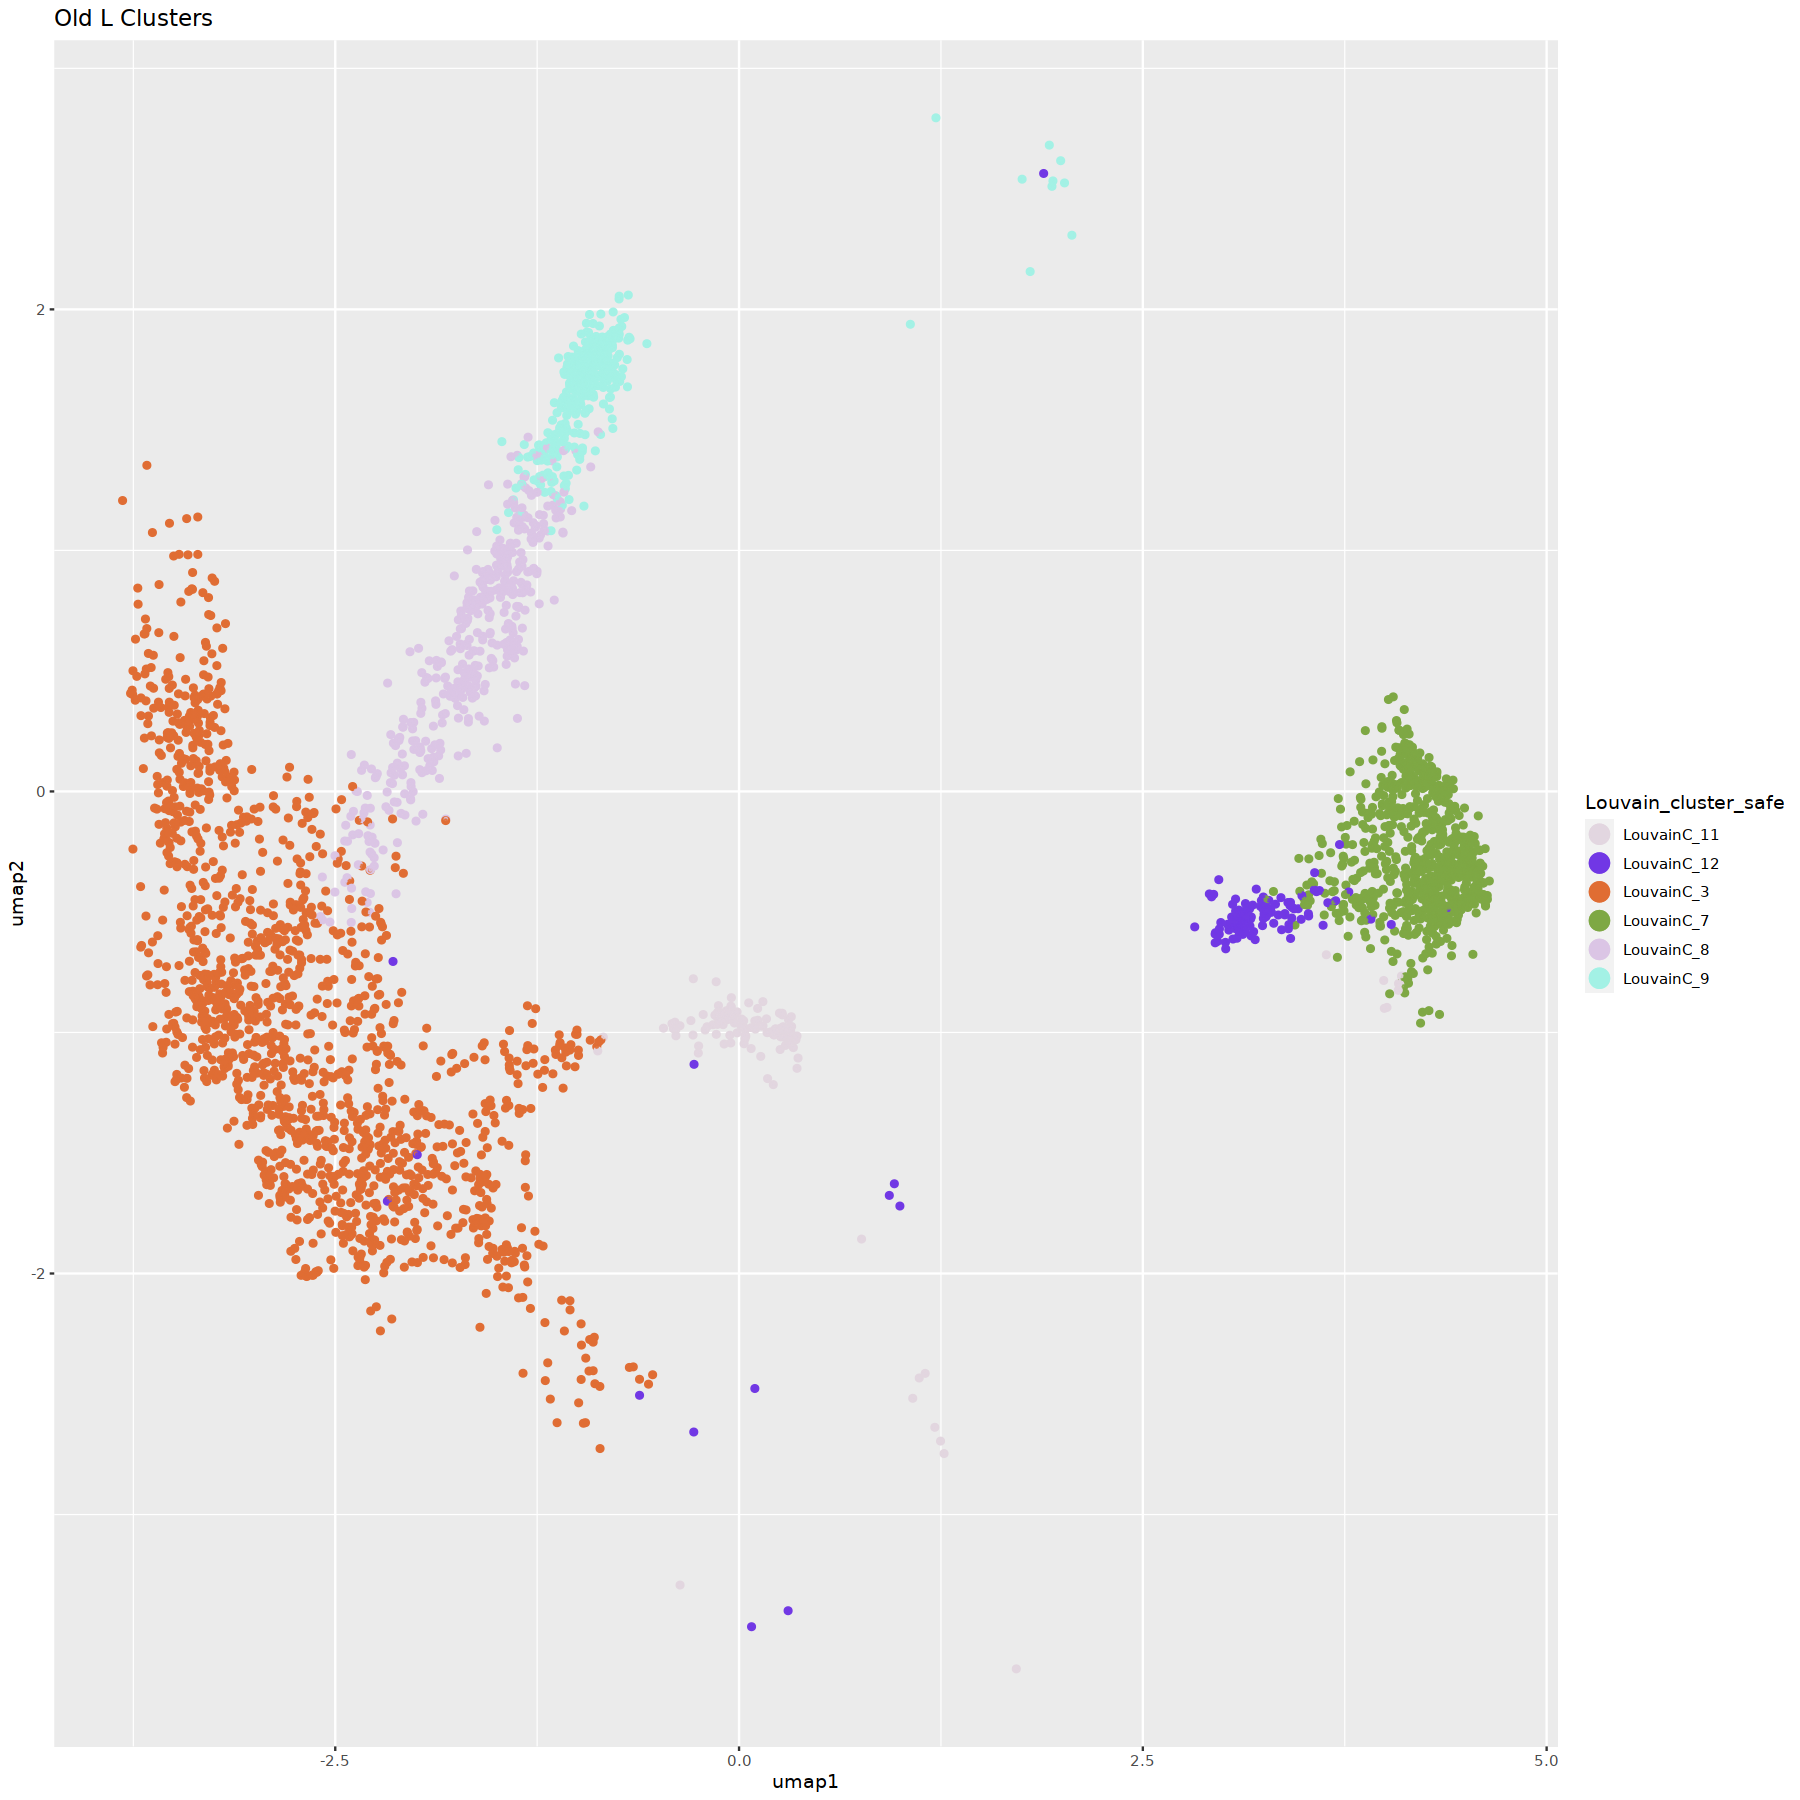

In [22]:
cleaned_cluster_meta <- loaded_socrates_data  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    


## SubClustering Unknown vascular Lineages:

library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


pm.subcluster.vasculature <- cleaned_cluster_meta
clusters <- c("LouvainC_3", "LouvainC_7","LouvainC_8","LouvainC_9","LouvainC_11",
  "LouvainC_12","LouvainC_13")


cleaned_cluster_meta  %>% 
    dplyr::filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

In [28]:
chosen_subcluster <- cleaned_cluster_meta %>% 
    filter(Louvain_cluster_safe %in% clusters)  %>% 
    ungroup()
str(chosen_subcluster)

tibble [3,285 × 24] (S3: tbl_df/tbl/data.frame)
 $ cellID              : chr [1:3285] "BC:Z:TGACCACCGTCCCAATTGAGTGGTGACC-panicum_millet.P1_G017_10x.1" "BC:Z:CGATGTATGTCAATACGACTGATACTAA-panicum_millet.C1_G017_10x.1" "BC:Z:CGATGTCCGTCCCAATTGTGGCCACTAA-panicum_millet.C1_G017_10x.1" "BC:Z:CGATGTCTTGTACTAAGGGTAGCTGACC-panicum_millet.C1_G017_10x.1" ...
 $ total               : int [1:3285] 58913 59250 57007 53818 52586 49785 45946 48728 49393 43317 ...
 $ tss                 : int [1:3285] 25437 25776 23793 22463 22002 20514 19256 20591 21218 18627 ...
 $ acrs                : int [1:3285] 49851 49982 47105 44771 42968 40733 36286 41453 42601 36399 ...
 $ ptmt                : int [1:3285] 455 294 106 438 375 109 549 273 83 507 ...
 $ nSites              : int [1:3285] 28823 28682 28320 26882 26560 25741 25343 24608 24510 22432 ...
 $ log10nSites         : num [1:3285] 4.46 4.46 4.45 4.43 4.42 ...
 $ pTSS                : num [1:3285] 0.432 0.435 0.417 0.417 0.418 ...
 $ FRiP               

In [31]:
str(cleaned_cluster_meta$cellID)

 chr [1:8709] "BC:Z:ACTTGAGATCAGCATCTGAGTGGTGACC-panicum_millet.B9_G021_10x.1" ...


In [32]:
meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- chosen_subcluster$cellID

In [33]:
pm.loaded_socrates_data.vasculature$meta <- meta_df
pm.loaded_socrates_data.vasculature$meta.v3 <- meta_df

In [36]:
pm.loaded_socrates_data.vasculature <- generateMatrix(pm.loaded_socrates_data.vasculature, 
                                              filtered=FALSE,
                                              blacklist="/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.cell_cycle_orthos.markers.bed",
                                              windows=500,
                                              peaks = FALSE,
                                              verbose=TRUE)

In [37]:
pm.loaded_socrates_data.vasculature <- convertSparseData(pm.loaded_socrates_data.vasculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [40]:
# clean sparse counts matrix ---------------------------------------------
pm.loaded_socrates_data.vasculature.clean <- cleanData(pm.loaded_socrates_data.vasculature, 
                     min.t=0.01,  # minimum feature frequency across cells
                     max.t=0.2, # maximum feature frequency across cells
                     verbose=T)

   * Input: cells = 3285 | peaks = 1494931

   * Filtered: cells = 3260 | peaks = 88742



In [44]:
pm.loaded_socrates_data.vasculature.clean$meta  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

# normalize with TFIDF ---------------------------------------------------
pm.subcluster.vasculature.tfidf <- tfidf(pm.loaded_socrates_data.vasculature.clean)

Louvain_cluster_safe,n()
<chr>,<int>
LouvainC_11,144
LouvainC_12,132
LouvainC_3,1449
LouvainC_7,717
LouvainC_8,432
LouvainC_9,386


In [ ]:
# project with NMF -------------------------------------------------------
pm.subcluster.vasculature.tfidf <- reduceDims(pm.subcluster.vasculature.tfidf,
                      method="SVD", 
                      n.pcs=50, 
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
pm.subcluster.vasculature.tfidf <- projectUMAP(pm.subcluster.vasculature.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

In [50]:
colnames(pm.subcluster.vasculature.tfidf$meta)

[1] "cellID"               "total"                "tss"                 
 [4] "acrs"                 "ptmt"                 "nSites"              
 [7] "log10nSites"          "pTSS"                 "FRiP"                
[10] "pOrg"                 "tss_z"                "acr_z"               
[13] "sites_z"              "qc_check"             "background"          
[16] "cellbulk"             "is_cell"              "sampleID"            
[19] "umap1"                "umap2"                "doubletscore"        
[22] "d.type"               "LouvainClusters"      "Louvain_cluster_safe"

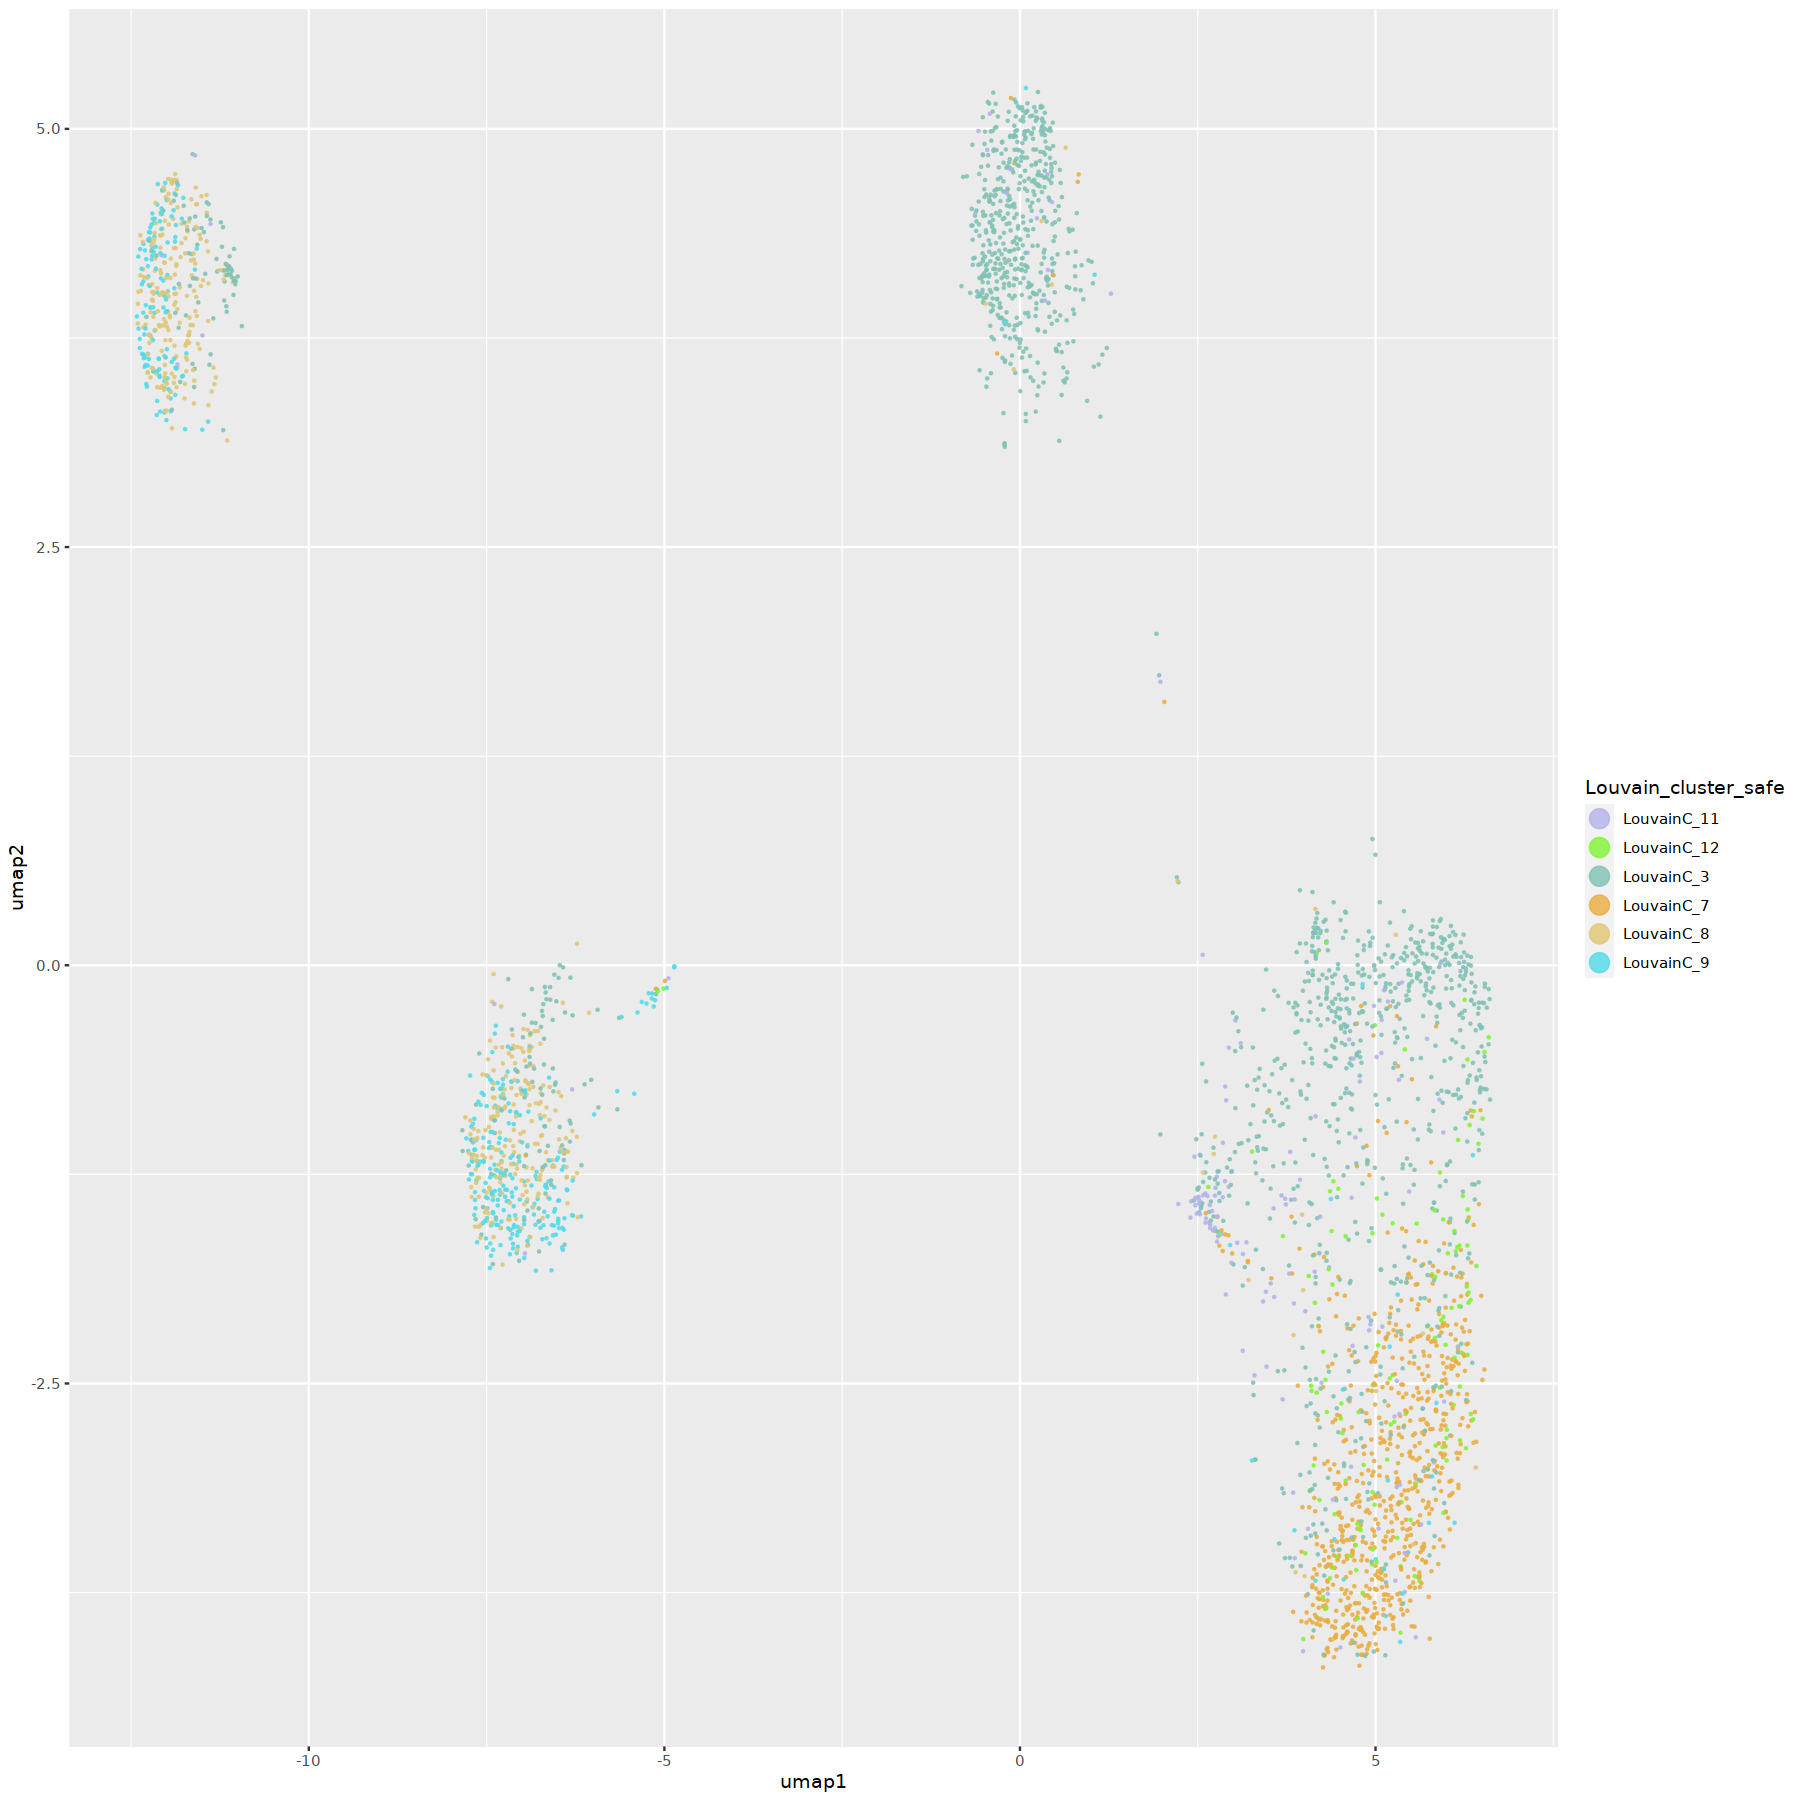

In [52]:
library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(pm.subcluster.vasculature.tfidf$meta, aes(x=umap1, y = umap2, color = Louvain_cluster_safe)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [74]:
# identify clusters using neighborhood graph -----------------------------
pm.subcluster.vasculature.tfidf.clusters <- callClusters(pm.subcluster.vasculature.tfidf, 
                        res=1.0,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(pm.subcluster.vasculature.tfidf.clusters$meta, aes(x=umap1, y = umap2, color = Louvain_cluster_safe)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(pm.subcluster.vasculature.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")

 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3210
Number of edges: 433186

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.7317
Number of communities: 7
Elapsed time: 9 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



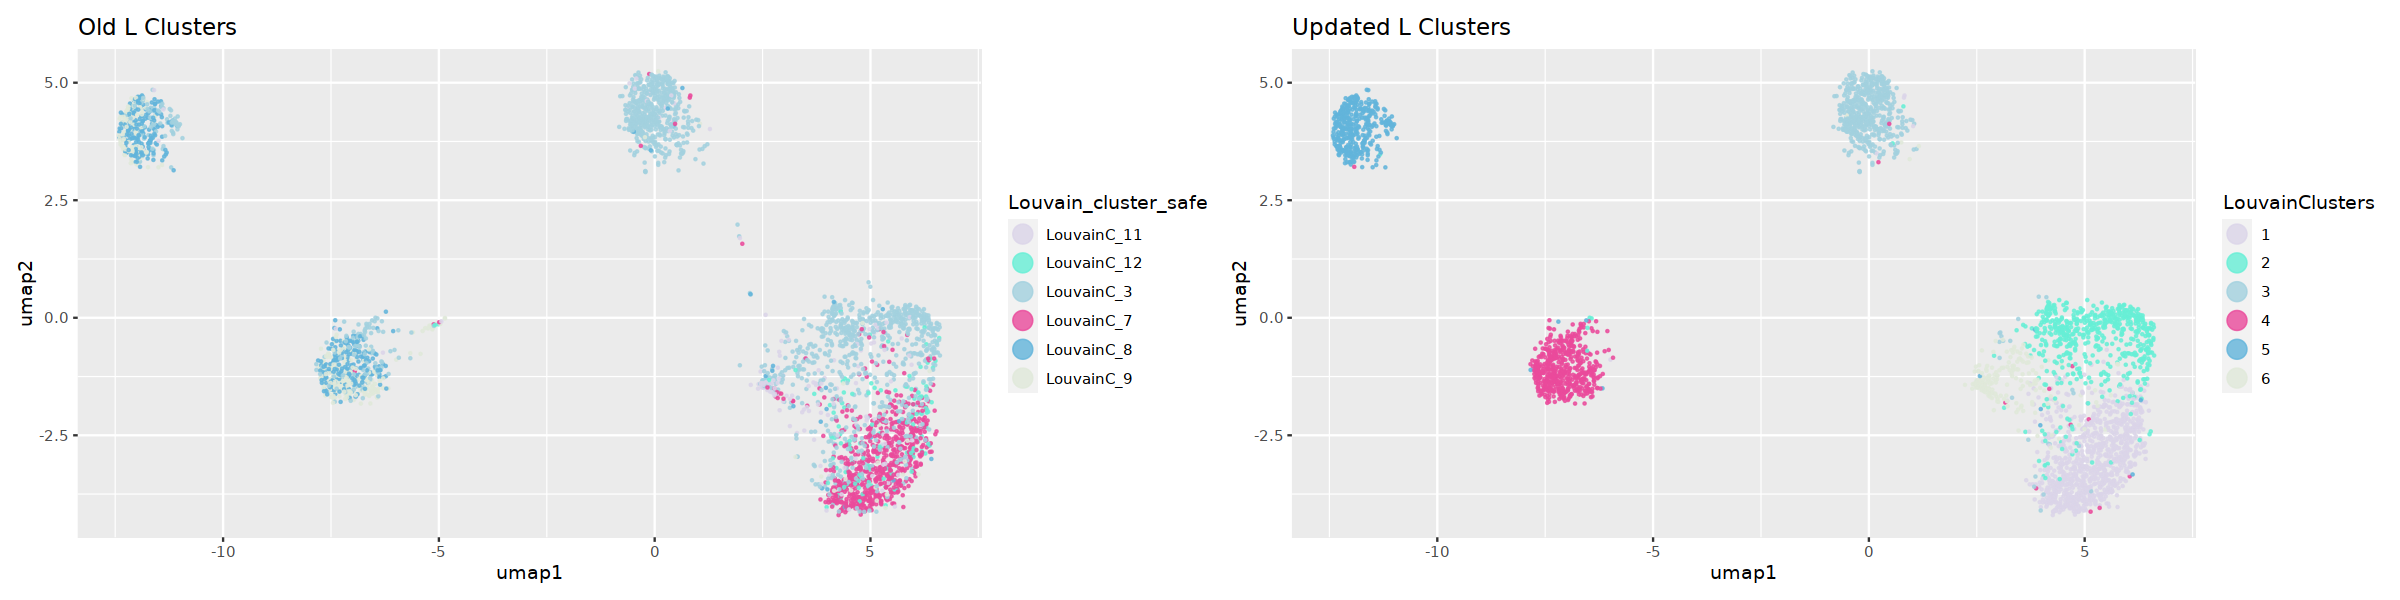

In [75]:
old_clusters + new_clusters 

In [76]:
pm.subcluster.vasculature.tfidf.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}

LouvainClusters,n()
<fct>,<int>
1,950
2,574
3,561
4,532
5,406
6,185


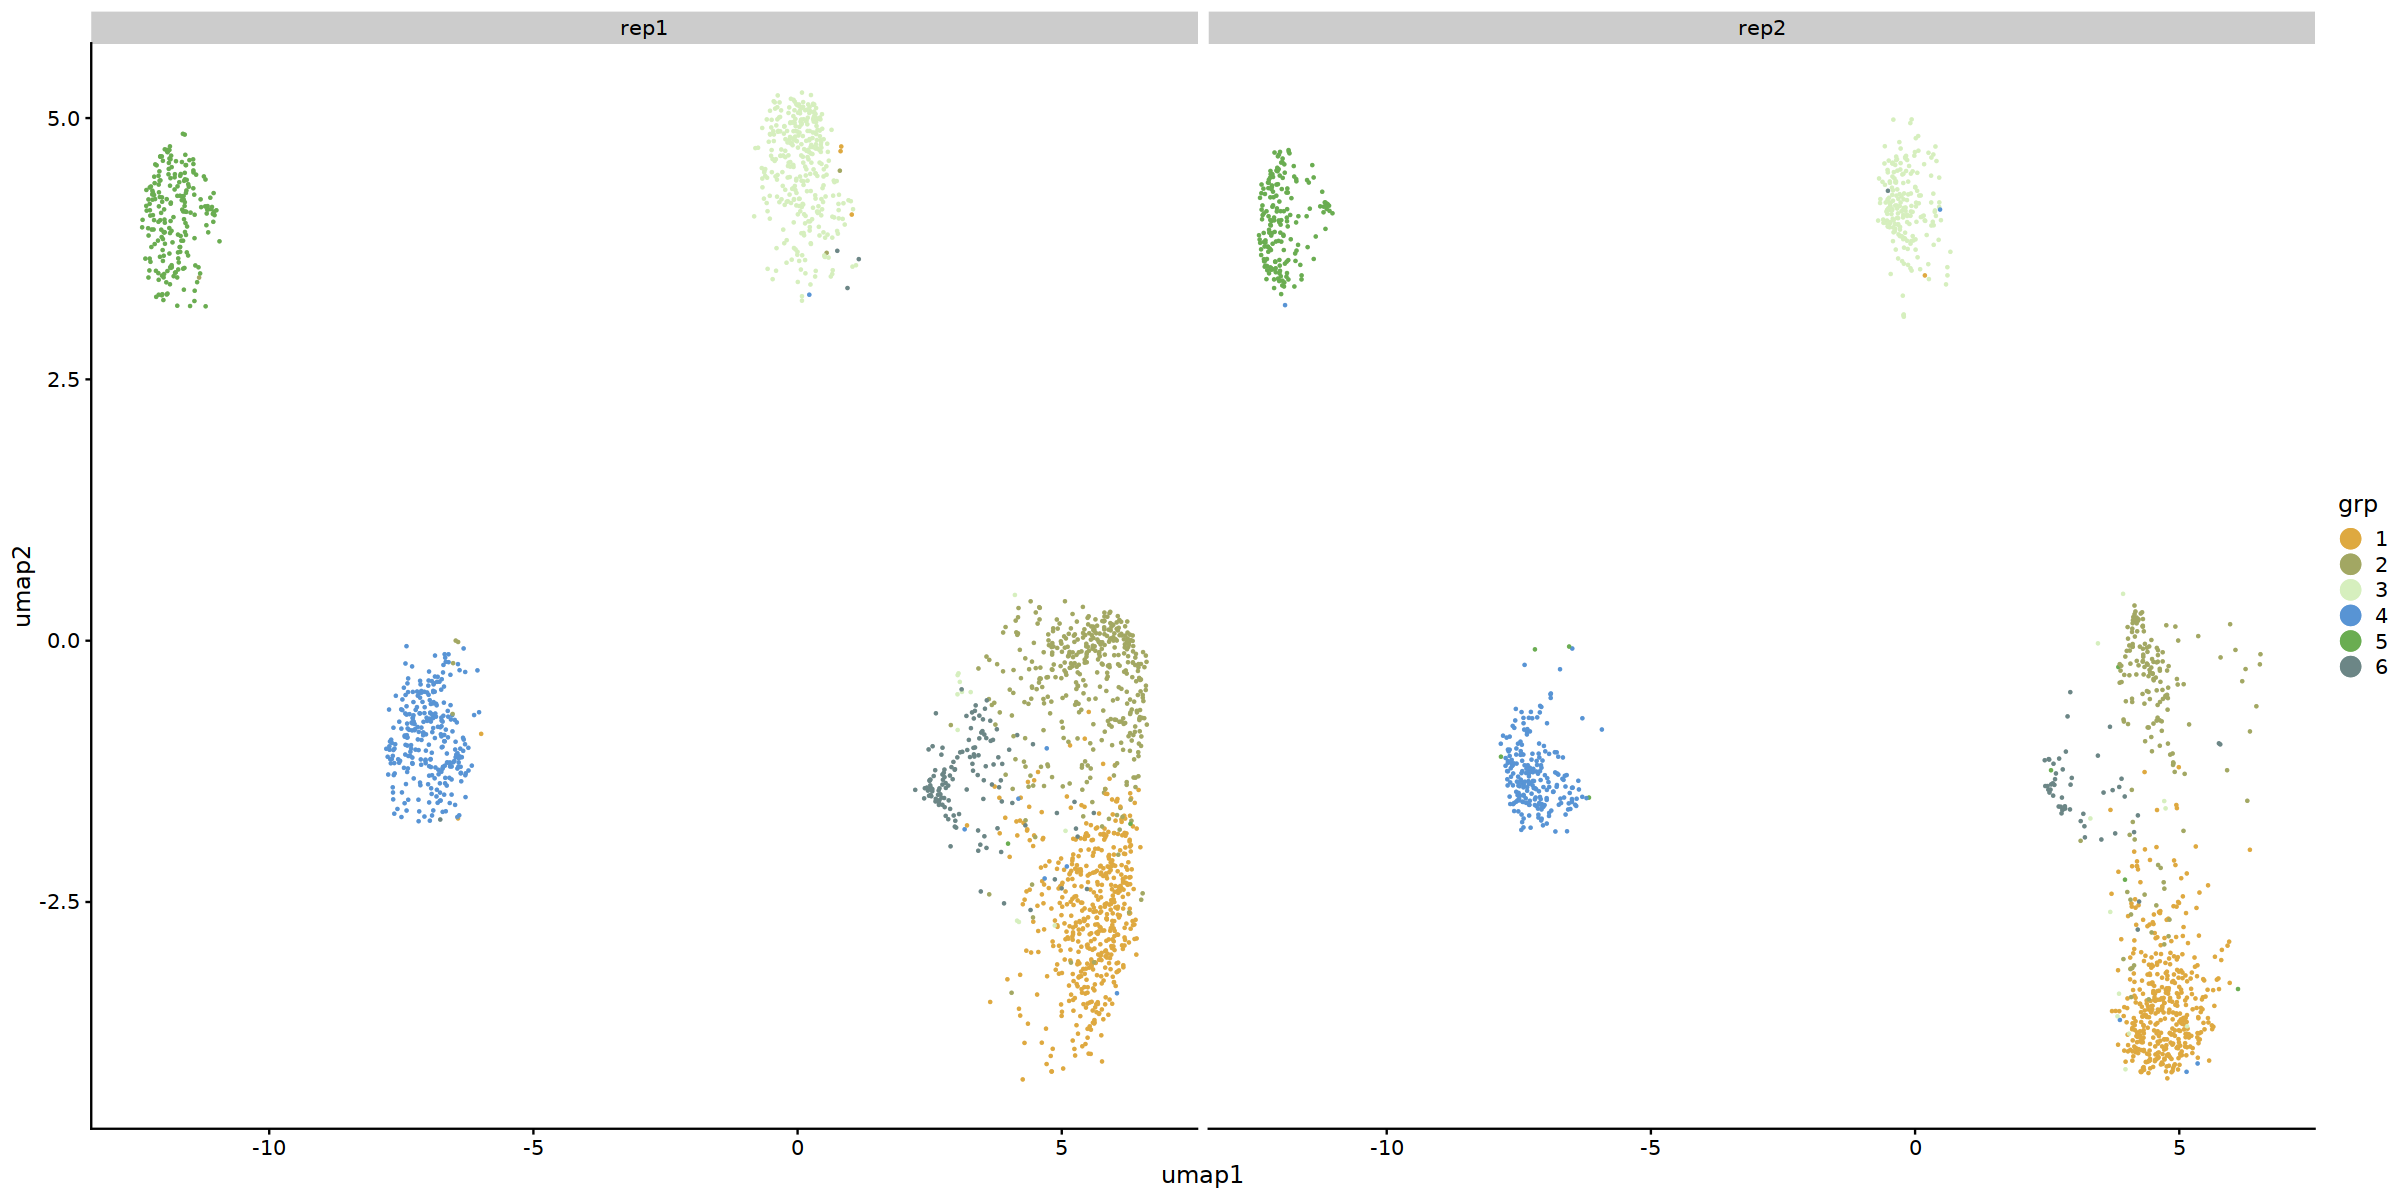

In [77]:
library(cowplot)
umap_cluster_colors <- c("#DEA940","#A2A763","#D6EEBE","#5894D4","#6AAD51","#6C8686","#FFD92F", "#7f2201","#b53310",
                         "#E7673B","#FB9A99","#E31A1C","#FDBF6F","#CAB2D6","#386CB0","#FFFFB3", "#5dead5","#c11577",
                         "#CCCCCC", "#7570B3","#B15928", "#6A3D9A", "#d87c6a", "#0060e8", "#84c5ff", "#ffd460", "#d81397")


col_scale <- scale_colour_manual(name = "grp", values = umap_cluster_colors)


options(repr.plot.width=20, repr.plot.height=10)
cluster_plot <- as_tibble(pm.subcluster.vasculature.tfidf.clusters$sub_cluster)

ggplot(cluster_plot ,aes(umap1, umap2, color = LouvainClusters)) + 
    col_scale + 
    geom_jitter(size = .1) + facet_grid(.~sampleID) + theme_half_open() +
    guides(colour = guide_legend(override.aes = list(size=5))) +
    geom_point(size = .25, alpha = .8)


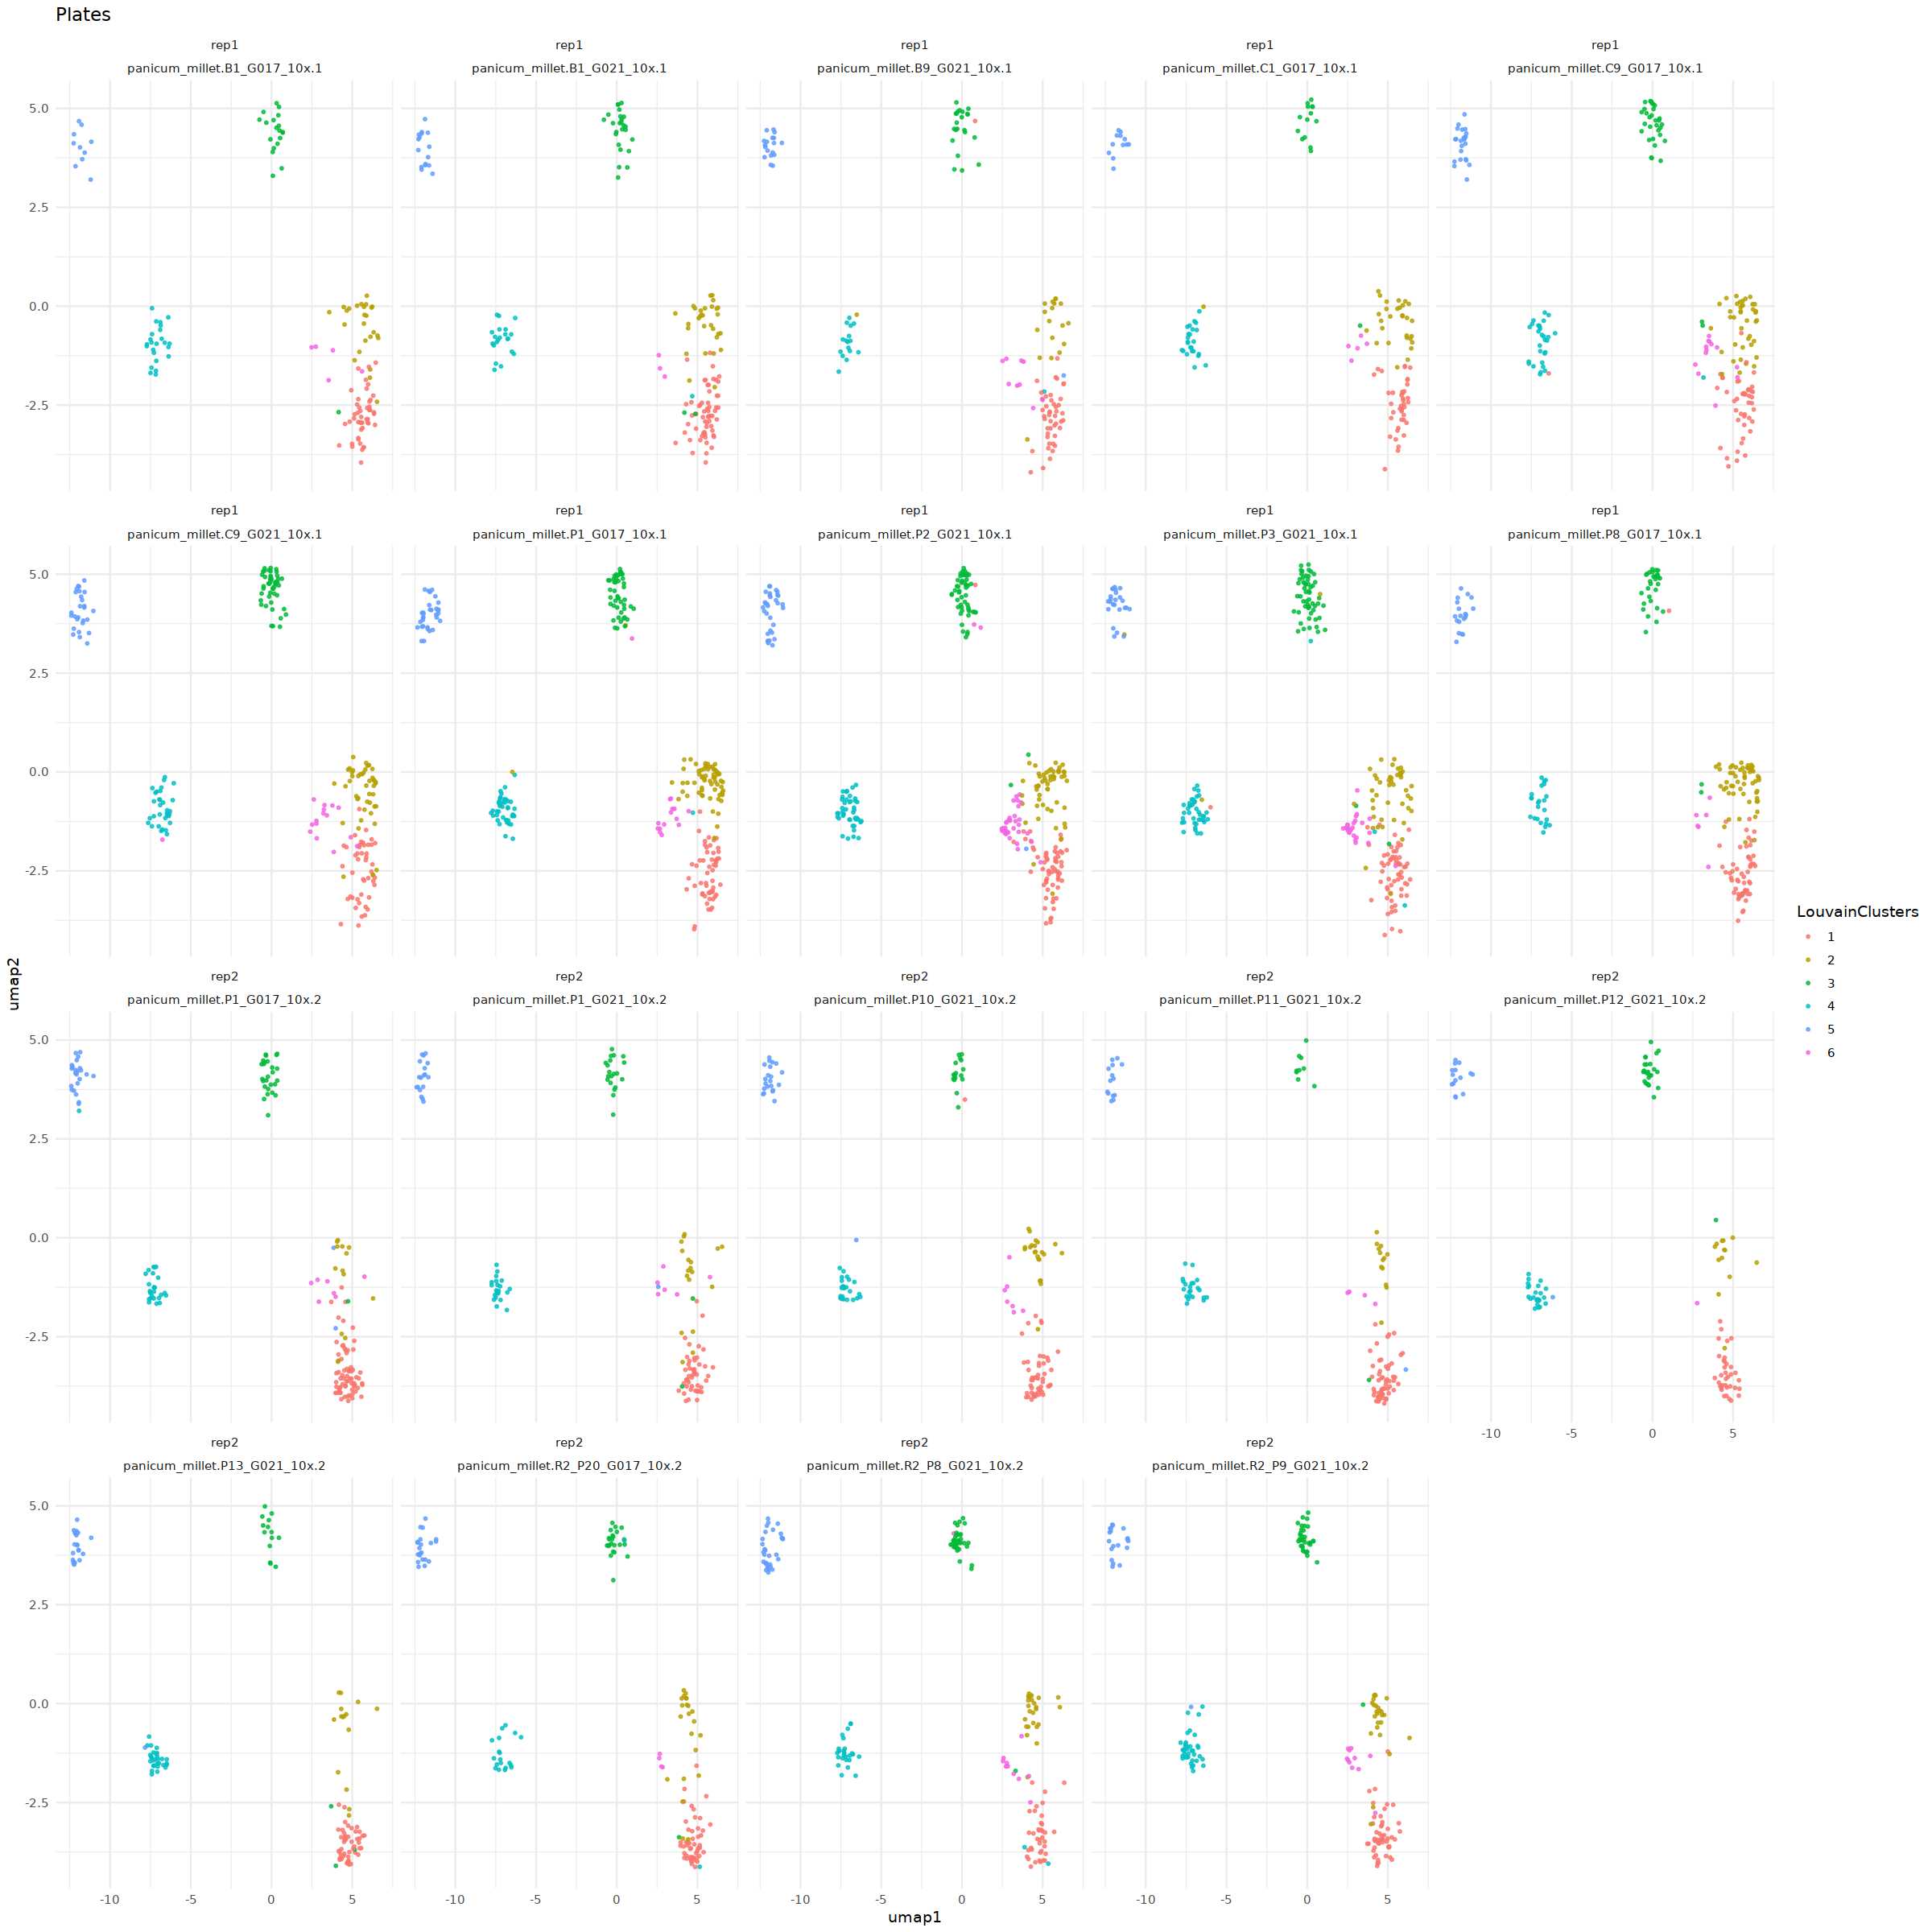

In [78]:
options(repr.plot.width=20, repr.plot.height=20)
cluster_plot  %>% 
    separate(col = "cellID", c("barcode", "plate"), sep = "-", remove = FALSE)  %>% 
    ggplot(., aes(umap1, umap2, color = LouvainClusters)) + 
    geom_point(size = .6, alpha = .8) + theme_minimal() + ggtitle("Plates") +
    facet_wrap(sampleID~plate)

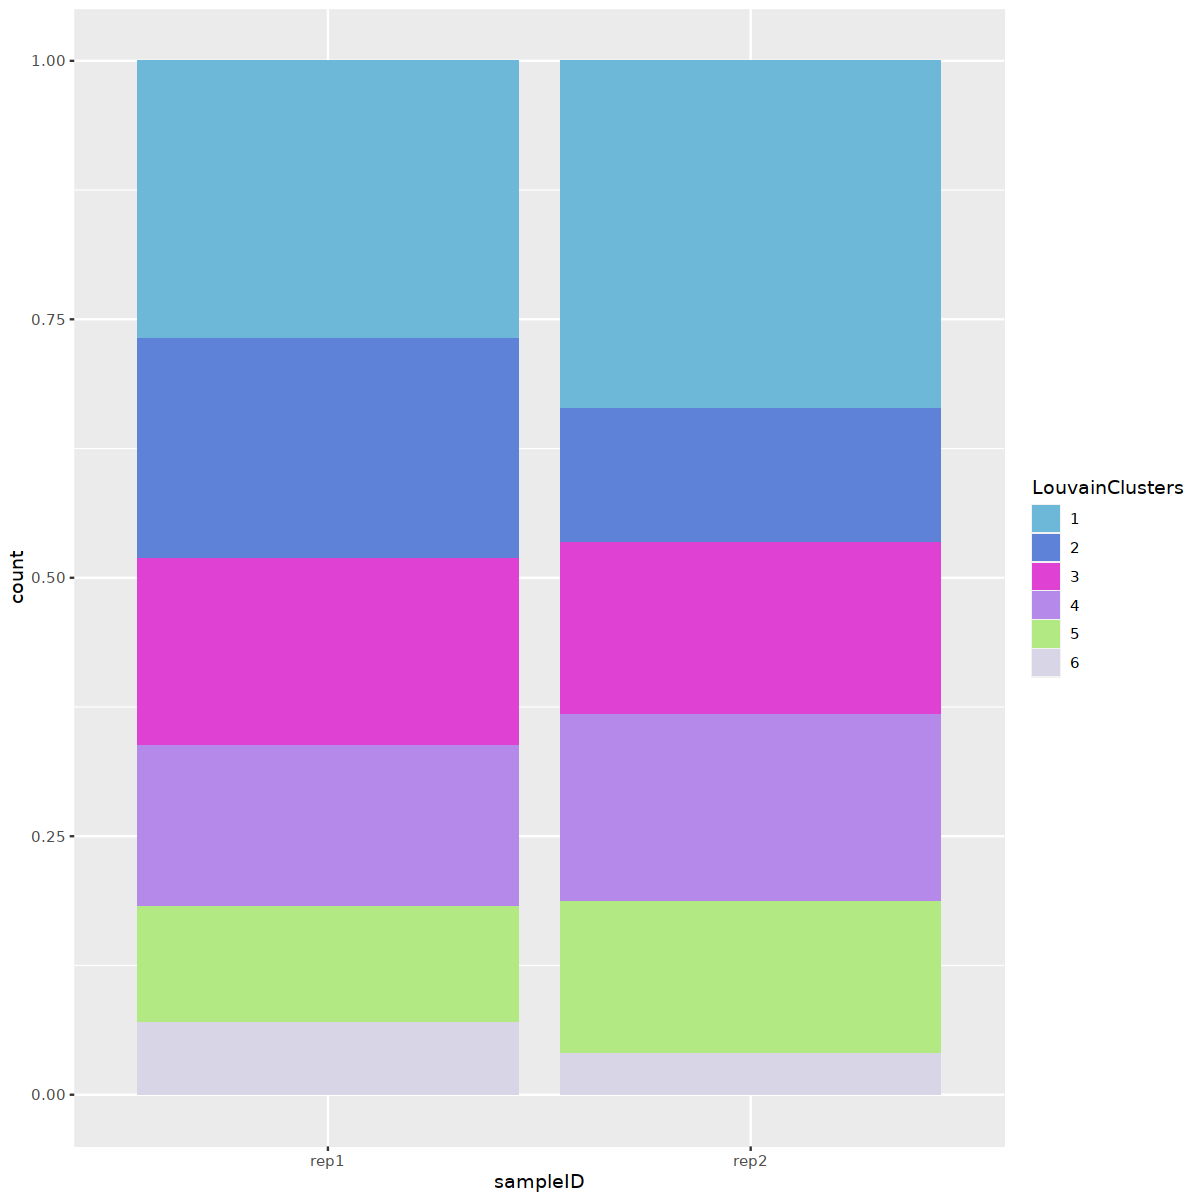

In [79]:

options(repr.plot.width=10, repr.plot.height=10)
library(RColorBrewer)
library(tidyverse)
other <- randomcoloR::distinctColorPalette(k = 41)
#cell_converted_trible <- as_tibble(tfidf.obj.dob.filt.clusters$Clusters)
ggplot(cluster_plot,aes(x = sampleID, fill = LouvainClusters)) + 
    geom_bar(position = "fill") + scale_fill_manual(values=other)


In [80]:
clusters_by_replicate <- cluster_plot  %>% 
    group_by(LouvainClusters, sampleID)  %>% 
    summarise(counts = n())

clusters_prop <- cluster_plot  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(total_cluster = n())


clusters_full_joined <- full_join(clusters_by_replicate, clusters_prop, by = c("LouvainClusters"))  %>% 
    mutate(prop_cluster = counts/total_cluster)

clusters_full_joined

`summarise()` has grouped output by 'LouvainClusters'. You can override using the `.groups` argument.


LouvainClusters,sampleID,counts,total_cluster,prop_cluster
<fct>,<chr>,<int>,<int>,<dbl>
1,rep1,515,950,0.5421053
1,rep2,435,950,0.4578947
2,rep1,407,574,0.7090592
2,rep2,167,574,0.2909408
3,rep1,346,561,0.6167558
3,rep2,215,561,0.3832442
4,rep1,299,532,0.5620301
4,rep2,233,532,0.4379699
5,rep1,215,406,0.5295567


Warning message:
"Removed 47 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 47 rows containing non-finite values (`stat_boxplot()`)."


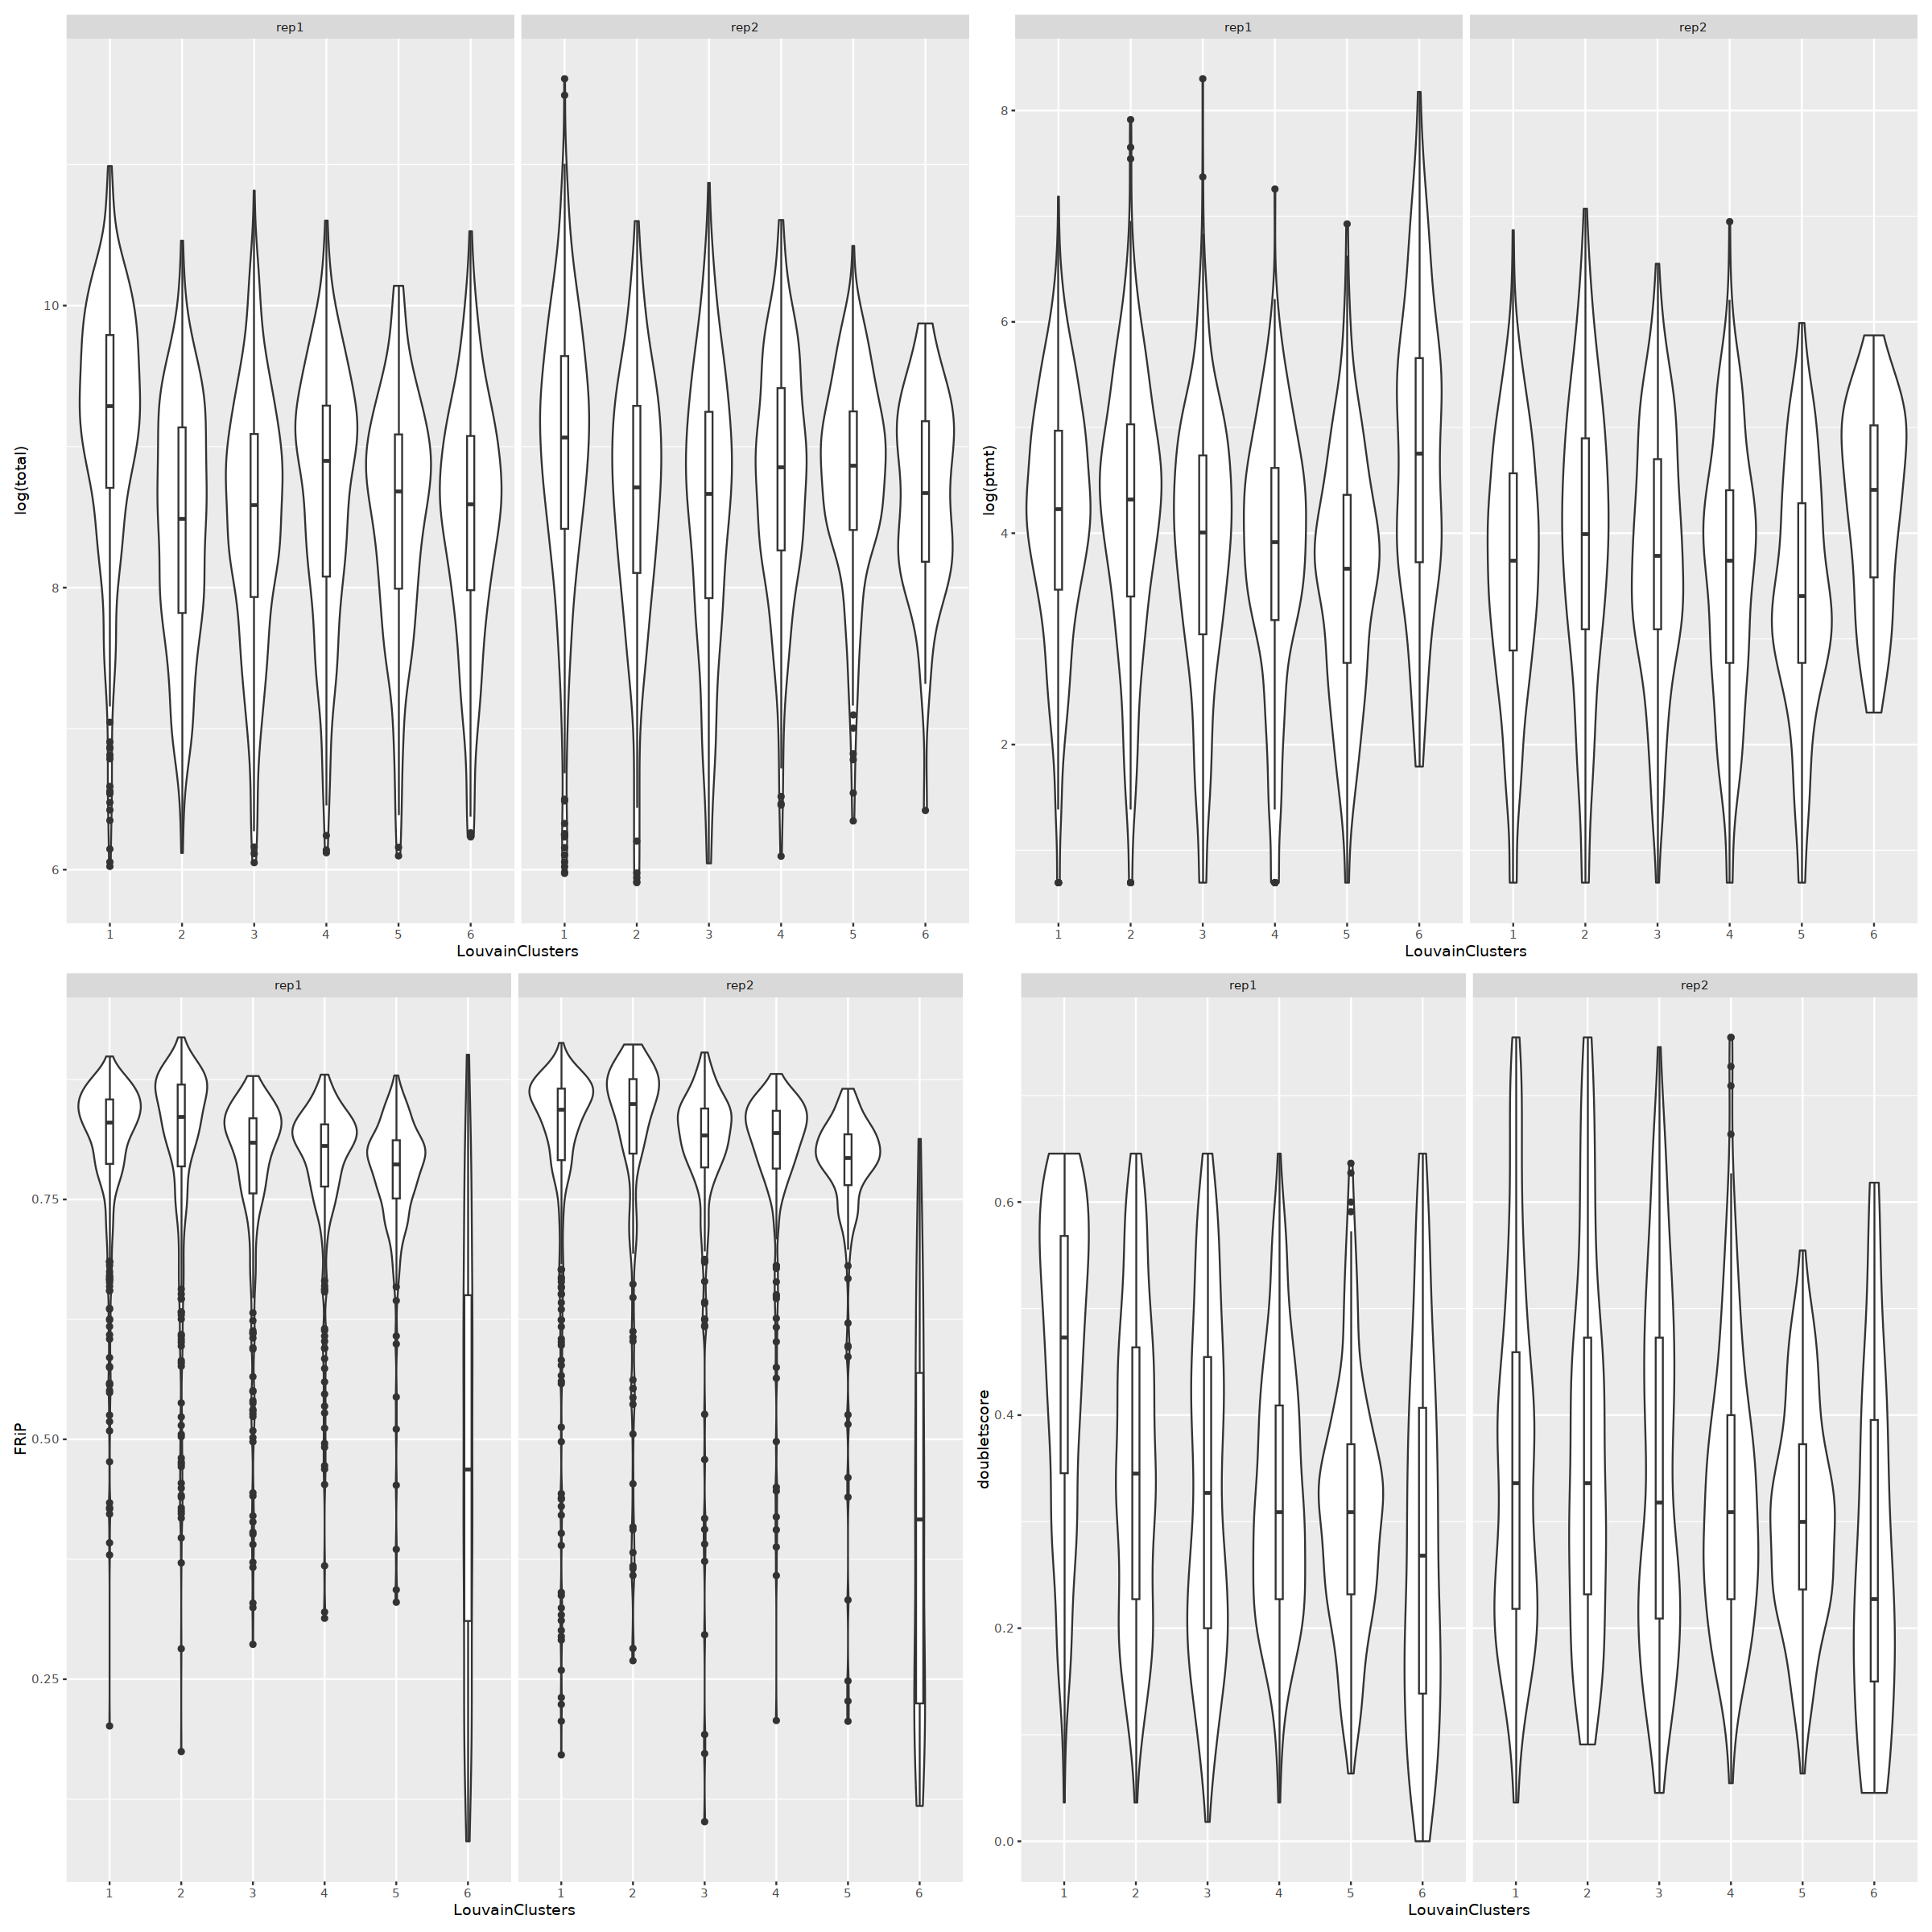

In [81]:
library(patchwork)

options(repr.plot.width=20, repr.plot.height=20)
total <- ggplot(cluster_plot ,aes(x = LouvainClusters, y = log(total))) + 
    geom_violin() + geom_boxplot(width=0.1) + facet_grid(.~sampleID)


ptmt <- ggplot(cluster_plot ,aes(x = LouvainClusters, y = log(ptmt))) + 
    geom_violin() + geom_boxplot(width=0.1) + facet_grid(.~sampleID)

tss <- ggplot(cluster_plot ,aes(x = LouvainClusters, y = tss)) + 
    geom_violin() + geom_boxplot(width=0.1) + facet_grid(.~sampleID)
 

frip <- ggplot(cluster_plot ,aes(x = LouvainClusters, y = FRiP)) + 
    geom_violin() + geom_boxplot(width=0.1) + facet_grid(.~sampleID)

doub <- ggplot(cluster_plot ,aes(x = LouvainClusters, y = doubletscore)) + 
    geom_violin() + geom_boxplot(width=0.1) + facet_grid(.~sampleID)

(total + ptmt) / (frip + doub)

# Running Presto and Cluster Correlation on LCs
## 4/3/2023

In [82]:
library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}

In [83]:
library(tidyverse)
#pm_meta_data <- read_delim("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/clustering/Pm_leaf.merged_replicates.SVD.full.metadata.txt", skip = 1,
#                           col_names =  c("row_n",'cellID', 'total', 'tss', 'acrs', 'ptmt', 'nSites', 'log10nSites', 'pTSS', 'FRiP', 'pOrg', 'tss_z', 'acr_z', 'sites_z', 'qc_check', 'background', 'cellbulk', 'is_cell', 'sampleID', 'umap1', 'umap2', 'doubletscore', 'd.type', 'LouvainClusters'))
pm_gene_counts <- "/scratch/jpm73279/comparative_single_cell/04.marker_annotation/panicum_millet/acc_metrics_leaf/panicum_millet.gene_body_acc_leaf.counts.txt" 
pm.subcluster.vasculature.tfidf.clusters$acr_counts_raw <- pm_gene_counts

In [84]:
library(presto)
Proso_millet.leaf.presto <- run_presto(pm.subcluster.vasculature.tfidf.clusters,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 24
  cellID    total   tss  acrs  ptmt nSites log10nSites  pTSS  FRiP    pOrg tss_z
  <chr>     <int> <int> <int> <int>  <dbl>       <dbl> <dbl> <dbl>   <dbl> <dbl>
1 BC:Z:TGA… 58913 25437 49851   455  28929        4.46 0.432 0.846 0.00772 0.311
2 BC:Z:CGA… 59250 25776 49982   294  28776        4.46 0.435 0.844 0.00496 0.323
3 BC:Z:CGA… 57007 23793 47105   106  28366        4.45 0.417 0.826 0.00186 0.262
4 BC:Z:CGA… 53818 22463 44771   438  26976        4.43 0.417 0.832 0.00814 0.262
5 BC:Z:ACA… 52586 22002 42968   375  26657        4.43 0.418 0.817 0.00713 0.265
6 BC:Z:TGA… 49785 20514 40733   109  25783        4.41 0.412 0.818 0.00219 0.243
# ℹ 13 more variables: acr_z <dbl>, sites_z <dbl>, qc_check <int>,
#   background <dbl>, cellbulk <dbl>, is_cell <int>, sampleID <chr>,
#   umap1 <dbl>, umap2 <dbl>, doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name       barcode                                    

In [85]:
grabbed_top_marker_per_cluster <- top_markers(Proso_millet.leaf.presto$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Proso_millet.leaf.presto$sub_cluster$LouvainClusters)) {
    
    #make_set <- setNames("geneID",i) 
    
    LC_top_genes <- grabbed_top_marker_per_cluster[, c("rank", i)]
    LC_top_genes <- dplyr::rename(LC_top_genes, geneID = as.character(i))
    
    markers_present_in_presto <- left_join(LC_top_genes, 
                                           marker_list_pm, by = c("geneID"))  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, geneID, chr, start, stop, gene_name, cell_type) %>% 
    dplyr::mutate(LC_value = str_c("LC", as.character(i),  sep ="_")) 
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

rank,geneID,chr,start,stop,gene_name,cell_type,LC_value
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,RLN17493.1,CM009691.2,7596626,7603024,NAD-ME_2,bundle_sheath,LC_1
4,RLN03794.1,CM009702.2,42576748,42579894,Zm00001eb034260__pval_0_mesophyll__pval_0_bundle_sheath,"mesophyll,bundle_sheath",LC_1
9,RLN41353.1,CM009690.2,61486982,61490183,Zm00001eb023950_pval_0_bundle_sheath_ortho_count_1__Zm00001eb390820_pval_0_bundle_sheath_ortho_count_1,bundle_sheath,LC_1
15,RLM80941.1,CM009701.2,11419570,11424794,Zm00001eb248170_pval_0_epidermis_ortho_count_2__Zm00001eb185470_pval_0_epidermis_ortho_count_2,epidermis,LC_1
20,RLN42931.1,CM009690.2,32780622,32786070,NAD-ME_1,bundle_sheath,LC_1
21,RLN38586.1,CM009690.2,13050689,13052700,Zm00001eb017800_pval_0_mesophyll_ortho_count_1,mesophyll,LC_1
25,RLN18274.1,CM009691.2,33844541,33849486,Zm00001eb023600_pval_0_mesophyll_ortho_count_1,mesophyll,LC_1
27,RLN05505.1,CM009702.2,31129039,31134594,Zm00001eb420190_pval_0_bundle_sheath,bundle_sheath,LC_1
28,RLN33031.1,CM009692.2,868215,875501,Zm00001eb316070_pval_0_mesophyll_ortho_count_2,mesophyll,LC_1


In [ ]:
gathered_markers <- bind_rows(represented_marker_lst)  %>% 
    arrange(LC_value, rank)

gathered_markers

In [87]:
library(edgeR)
library(preprocessCore)
devtools::load_all('/home/jpm73279/software/preprocessCore')
library("edgeR")

marker_correlation <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
   
    
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    
    raw_cpm_counts_all_genes <- read_delim(sparse_matrix, delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
        dplyr::mutate(cellID = barcode)  %>%
        dplyr::mutate(geneID = gene_name)

    merged_meta_cpm_information <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
        group_by(!!sym(cluster_name), geneID)  %>%
        summarise(counts = sum(accessability, na.rm = TRUE))

    ### Alt CPM Calc
    merged_meta_cpm_information_copied <- merged_meta_cpm_information
    catch <- merged_meta_cpm_information_copied  %>%
        group_by(!!sym(cluster_name)) %>%
        group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
        unlist()


    caught_values <- as_tibble(catch)

    see <- ungroup(merged_meta_cpm_information_copied)
    idk <- bind_cols(merged_meta_cpm_information_copied,caught_values)  
    print(head(idk))
    
    merged_meta_cpm_information_copied<- bind_cols(merged_meta_cpm_information_copied,caught_values)  %>% 
        ungroup()  %>% 
        dplyr::rename(grouped_CPM = value)  %>% 
        dplyr::group_by(!!sym(cluster_name)) %>%  
        dplyr::mutate(log_cpm  = log(grouped_CPM))


    #Apply quantile normalization
    merged_meta.quant_norm <- merged_meta_cpm_information_copied  %>% 
        group_by(!!sym(cluster_name))  %>% 
        group_map(~(preprocessCore::normalize.quantiles(data.matrix(.x$grouped_CPM), copy = FALSE)), .keep = TRUE)  %>% 
        unlist()

    zm.quantile_normalized <- as_tibble(merged_meta.quant_norm)  %>% 
        dplyr::rename("quant_norm_cpm" = value)


    merged_meta_cpm_information_copied <- bind_cols(merged_meta_cpm_information_copied, zm.quantile_normalized)

    cell_type_accessability <- merged_meta_cpm_information_copied  %>% 
        dplyr::ungroup()  %>% 
        dplyr::select(!!sym(cluster_name), geneID, quant_norm_cpm)  %>% 
        pivot_wider(names_from = !!sym(cluster_name), values_from = quant_norm_cpm, values_fill = 0)
    
    meta_obj[["corr_matrix"]] <- cell_type_accessability
    
    return(meta_obj)
}


Loading required package: limma


Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA


ℹ Loading preprocessCore


# A tibble: 6 × 24
  cellID    total   tss  acrs  ptmt nSites log10nSites  pTSS  FRiP    pOrg tss_z
  <chr>     <int> <int> <int> <int>  <dbl>       <dbl> <dbl> <dbl>   <dbl> <dbl>
1 BC:Z:TGA… 58913 25437 49851   455  28929        4.46 0.432 0.846 0.00772 0.311
2 BC:Z:CGA… 59250 25776 49982   294  28776        4.46 0.435 0.844 0.00496 0.323
3 BC:Z:CGA… 57007 23793 47105   106  28366        4.45 0.417 0.826 0.00186 0.262
4 BC:Z:CGA… 53818 22463 44771   438  26976        4.43 0.417 0.832 0.00814 0.262
5 BC:Z:ACA… 52586 22002 42968   375  26657        4.43 0.418 0.817 0.00713 0.265
6 BC:Z:TGA… 49785 20514 40733   109  25783        4.41 0.412 0.818 0.00219 0.243
# ℹ 13 more variables: acr_z <dbl>, sites_z <dbl>, qc_check <int>,
#   background <dbl>, cellbulk <dbl>, is_cell <int>, sampleID <chr>,
#   umap1 <dbl>, umap2 <dbl>, doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>


Rows: 54642541 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'LouvainClusters'. You can override using the `.groups` argument.


# A tibble: 6 × 4
# Groups:   LouvainClusters [1]
  LouvainClusters geneID          counts  value
  <fct>           <chr>            <dbl>  <dbl>
1 1               C2845_PMCG10002   2296 382.  
2 1               C2845_PMCG10004    149  24.8 
3 1               C2845_PMCG10007     25   4.16
4 1               C2845_PMCG10009     82  13.6 
5 1               C2845_PMCG10011    221  36.7 
6 1               C2845_PMCG10012    221  36.7 


Selecting by resid


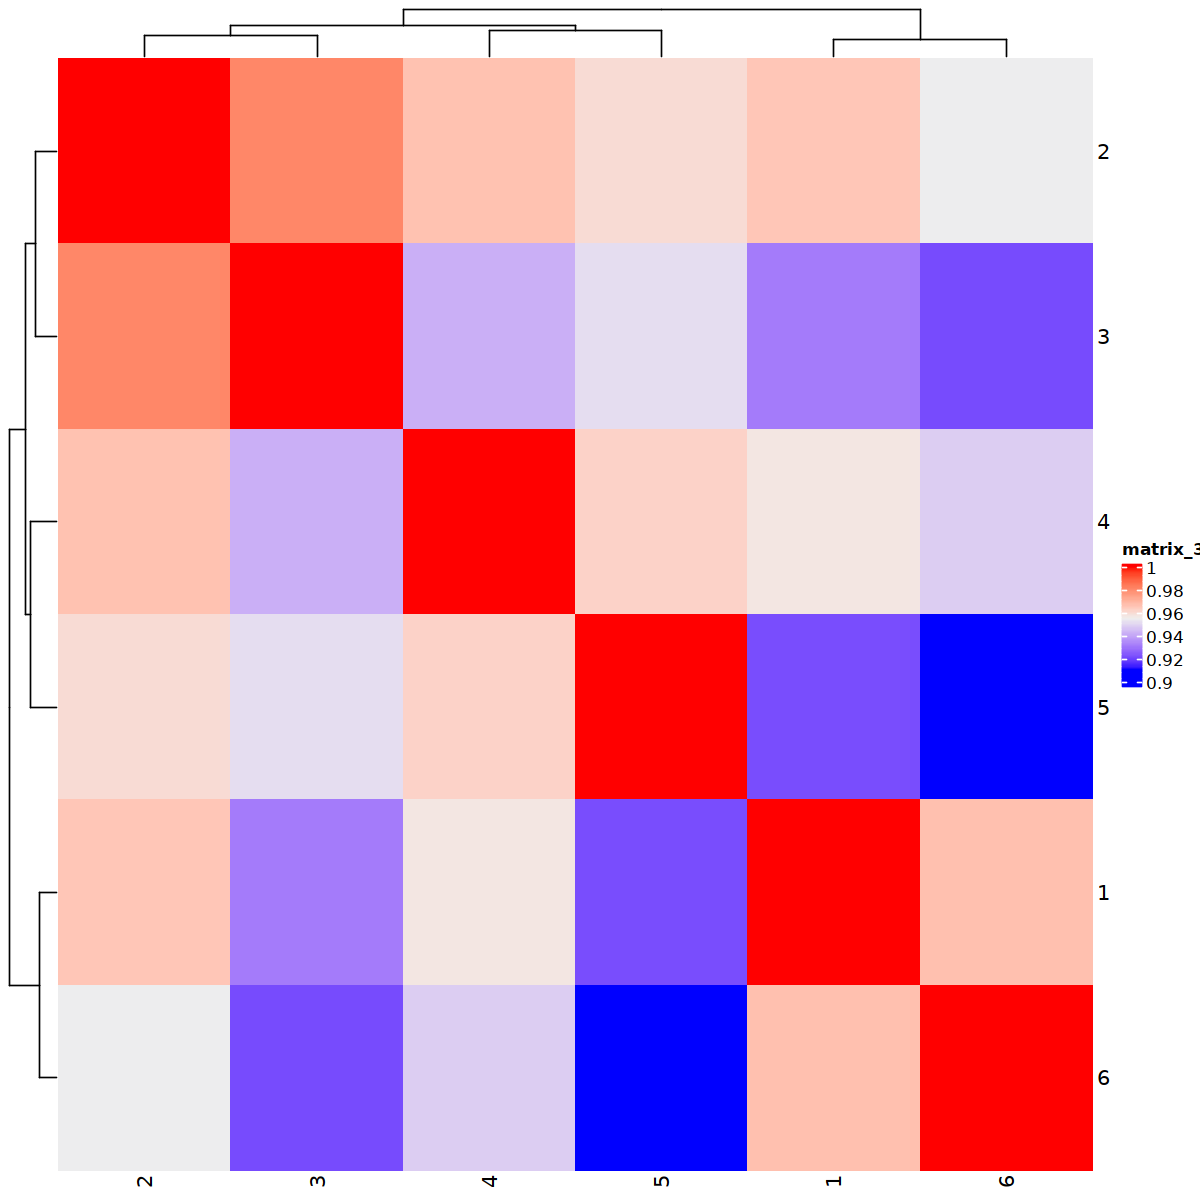

In [97]:
Proso_millet.leaf.corr <- marker_correlation(Proso_millet.leaf.presto,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

library(modelr)
combined_louvain_clusters <- as_tibble(Proso_millet.leaf.corr$corr_matrix) %>%
    pivot_longer(!geneID, names_to = "cluster_name", values_to = "score")  %>% 
    group_by(geneID)  %>% 
      summarize(mean = mean(score),
            var = var(score))

regression <- loess(var ~ mean, data=combined_louvain_clusters)

combined_louvain_clusters.final <- combined_louvain_clusters %>% 
    add_residuals(regression)  %>% 
    arrange(resid, desc = FALSE)  %>% 
    top_n(100)

options(repr.plot.width=10, repr.plot.height=10)
corr_matrix <- Proso_millet.leaf.corr$corr_matrix

viz_matrix <- as_tibble(corr_matrix)  %>% 
    dplyr::filter(geneID %in% combined_louvain_clusters.final$geneID)  %>% 
    dplyr::select(-geneID)

Lc_corr_matrix <- cor(data.matrix(viz_matrix))

suppressPackageStartupMessages(library(ComplexHeatmap))
library(ComplexHeatmap)
Heatmap(Lc_corr_matrix)

In [92]:
represented_marker_lst

rank,geneID,chr,start,stop,gene_name,cell_type,LC_value
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,RLN17493.1,CM009691.2,7596626,7603024,NAD-ME_2,bundle_sheath,LC_1
4,RLN03794.1,CM009702.2,42576748,42579894,Zm00001eb034260__pval_0_mesophyll__pval_0_bundle_sheath,"mesophyll,bundle_sheath",LC_1
9,RLN41353.1,CM009690.2,61486982,61490183,Zm00001eb023950_pval_0_bundle_sheath_ortho_count_1__Zm00001eb390820_pval_0_bundle_sheath_ortho_count_1,bundle_sheath,LC_1
15,RLM80941.1,CM009701.2,11419570,11424794,Zm00001eb248170_pval_0_epidermis_ortho_count_2__Zm00001eb185470_pval_0_epidermis_ortho_count_2,epidermis,LC_1
20,RLN42931.1,CM009690.2,32780622,32786070,NAD-ME_1,bundle_sheath,LC_1
21,RLN38586.1,CM009690.2,13050689,13052700,Zm00001eb017800_pval_0_mesophyll_ortho_count_1,mesophyll,LC_1
25,RLN18274.1,CM009691.2,33844541,33849486,Zm00001eb023600_pval_0_mesophyll_ortho_count_1,mesophyll,LC_1
27,RLN05505.1,CM009702.2,31129039,31134594,Zm00001eb420190_pval_0_bundle_sheath,bundle_sheath,LC_1
28,RLN33031.1,CM009692.2,868215,875501,Zm00001eb316070_pval_0_mesophyll_ortho_count_2,mesophyll,LC_1


In [95]:
str(Proso_millet.leaf.presto)

List of 13
 $ counts        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:6822963] 3 7 15 30 33 38 40 87 88 93 ...
  .. ..@ p       : int [1:3261] 0 13972 27765 41636 54404 66817 78934 90657 102676 114604 ...
  .. ..@ Dim     : int [1:2] 88742 3260
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:88742] "CM009689.1_10001_10500" "CM009689.1_10501_11000" "CM009689.1_106501_107000" "CM009689.1_11001_11500" ...
  .. .. ..$ : chr [1:3260] "BC:Z:TGACCACCGTCCCAATTGAGTGGTGACC-panicum_millet.P1_G017_10x.1" "BC:Z:CGATGTATGTCAATACGACTGATACTAA-panicum_millet.C1_G017_10x.1" "BC:Z:CGATGTCCGTCCCAATTGTGGCCACTAA-panicum_millet.C1_G017_10x.1" "BC:Z:CGATGTCTTGTACTAAGGGTAGCTGACC-panicum_millet.C1_G017_10x.1" ...
  .. ..@ x       : num [1:6822963] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ meta          :'data.frame':	3260 obs. of  24 variables:
  ..$ cellID              : chr [1:3260] "BC:Z:TGACCACCGTCCCAATTGAGTGGTGACC-panicum_millet.P1_G017_10x.1" "BC:Z:CGA

In [96]:
prefix <- "Pm_leaf.merged_replicates.Subclustering_vasculature"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet/clustering/"

# output text files
nmf.meta <- Proso_millet.leaf.presto$sub_cluster
nmf.rd <- Proso_millet.leaf.presto$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Proso_millet.leaf.presto$counts))
trip$i <- rownames(Proso_millet.leaf.presto$counts)[trip$i]
trip$j <- colnames(Proso_millet.leaf.presto$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")
saveRDS(Proso_millet.leaf.presto, file = paste0(output_location, prefix, ".rds"))